In [1]:
import pandas as pd
import geopandas as gpd

In [12]:
#Loading in base emissions data
emissions_data = pd.read_csv('Emissions_Data_w_Census_Tracts_Pivot.csv')

#Merging with Spatial Weight Matrix and applying weights
swm = pd.read_excel('SWM.xlsx')
swm = swm.merge(emissions_data, how = 'left', left_on = 'TRACTINT', right_on = 'TractCE')
swm = swm.fillna(0)
for row in swm.index:
    for col in swm.columns.to_list()[6:]:
        swm.loc[row, col] = swm.loc[row, col] * swm.loc[row, 'WEIGHT'] * 10

#Grouping on census tract
groupedSwm = swm.groupby(['NID', 'Year'], as_index=False).sum()
groupedSwm = groupedSwm[groupedSwm['Year']!=0]
groupedSwm

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,NID,Year,OBJECTID,TRACTINT,WEIGHT,TractCE,"1,1,2-Trichloroethane","1,1,2,2-Tetrachloroethane","1,2-Ethanediol (Ethylene Glycol)","1,3-Butadiene",...,Styrene,Sulfur Oxides,Sulfuric Acid,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Volatile Organic Compounds,Xylenes (Isomers And Mixture),Grand Total
1,10300,2016.0,121374,3933600,0.159491,3933600.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.733380,0.0,0.000000,0.182015,0.000000,0.0,6.223307,0.290587,48663.496860
2,10300,2017.0,121374,3933600,0.159491,3933600.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.681632,0.0,0.000000,0.234562,0.000000,0.0,7.080312,0.105030,48779.343513
3,10300,2018.0,124677,4914200,0.170670,4914200.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.700667,0.0,0.000000,0.198472,0.000000,0.0,6.468498,0.128643,51253.473848
4,10300,2019.0,132984,3984600,0.173905,3984600.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.649873,0.0,0.000000,0.211597,0.000000,0.0,8.283386,0.117317,47330.528477
6,20100,2016.0,119309,4341800,0.145400,4341800.0,0.006304,0.0,0.000000,0.0,...,0.001261,0.801701,0.0,0.044126,0.260962,0.005043,0.0,6.700921,0.408664,37694.236698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,981800,2019.0,103344,1137600,0.087558,1137600.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.170989,0.0,0.000000,0.853794,0.431777,0.0,7.097405,0.915736,2880.569690
1858,982200,2016.0,158443,3132400,0.191920,3132400.0,0.000000,0.0,0.007717,0.0,...,0.000000,0.937071,0.0,0.000000,0.133247,0.338688,0.0,9.774023,0.253387,43700.242314
1859,982200,2017.0,158443,3132400,0.191920,3132400.0,0.000000,0.0,0.006602,0.0,...,0.000000,0.819972,0.0,0.000000,0.190685,0.336986,0.0,10.638395,0.273597,43963.206050
1860,982200,2018.0,158443,3132400,0.191920,3132400.0,0.000000,0.0,0.054020,0.0,...,0.000000,0.831310,0.0,0.000000,0.044615,0.301245,0.0,9.704376,0.229193,45300.544270


In [13]:
#Renaming for mergin
w_emissions_data = groupedSwm
w_emissions_data = pd.read_csv("weighted_emissions_data.csv", index_col=0)
w_emissions_data = w_emissions_data.drop(['OBJECTID', 'TRACTINT', 'WEIGHT', 'TractCE'], axis = 1)
w_emissions_data = w_emissions_data.rename(columns={'NID':'TractCE'})

#Grouping together weighted data with original data
temp = pd.concat([w_emissions_data, emissions_data], axis = 0)
temp = temp.groupby(['TractCE', 'Year'], as_index=False).sum()
temp

,TractCE,Year,"1,1,2-Trichloroethane","1,1,2,2-Tetrachloroethane","1,2-Ethanediol (Ethylene Glycol)","1,3-Butadiene","1,4-Dichlorobenzene","1,4-Dioxane (1,4-Diethyleneoxide)","2,2,4-Trimethylpentane",Acetaldehyde,...,Styrene,Sulfur Oxides,Sulfuric Acid,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Volatile Organic Compounds,Xylenes (Isomers And Mixture),Grand Total
0,10300,2016.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.010000,...,0.000000,1.483380,0.0,0.000000,0.212015,0.000000,0.0,8.133307,0.300587,48732.386860
1,10300,2017.0,0.000000,0.0,0.010000,0.0,0.000000,0.000000,0.000000,0.010000,...,0.000000,1.531632,0.0,0.000000,0.274562,0.000000,0.0,10.400312,0.115030,48874.393613
2,10300,2018.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.620667,0.0,0.000000,0.228472,0.000000,0.0,8.698498,0.148643,59084.543848
3,10300,2019.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.019873,0.0,0.000000,0.211597,0.000000,0.0,9.693386,0.117317,57853.168877
4,20100,2016.0,0.006304,0.0,0.000000,0.0,0.044126,0.001261,0.000000,0.002029,...,0.001261,0.981701,0.0,0.044126,0.260962,0.005043,0.0,8.350921,0.408664,74104.676798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,981800,2019.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.015680,0.000000,...,0.000000,0.170989,0.0,0.000000,0.853794,0.431777,0.0,7.097405,0.915736,2880.569690
1475,982200,2016.0,0.000000,0.0,0.007717,0.0,0.000000,0.000000,0.015863,0.001200,...,0.000000,1.247071,0.0,0.000000,0.133247,0.338688,0.0,12.624023,0.253387,105980.662714
1476,982200,2017.0,0.000000,0.0,0.006602,0.0,0.000000,0.000000,0.022209,0.001200,...,0.000000,1.129972,0.0,0.000000,0.190685,0.336986,0.0,13.508395,0.273597,106889.946450
1477,982200,2018.0,0.000000,0.0,0.054020,0.0,0.000000,0.000000,0.012691,0.000000,...,0.000000,1.191310,0.0,0.000000,0.044615,0.301245,0.0,13.014376,0.229193,117497.084770


,TRACTCE,Year,"1,1,2-Trichloroethane","1,1,2,2-Tetrachloroethane","1,2-Ethanediol (Ethylene Glycol)","1,3-Butadiene","1,4-Dichlorobenzene","1,4-Dioxane (1,4-Diethyleneoxide)","2,2,4-Trimethylpentane",Acetaldehyde,...,Styrene,Sulfur Oxides,Sulfuric Acid,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Volatile Organic Compounds,Xylenes (Isomers And Mixture),Grand Total
0,50900,2016.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.016377,0.001580,...,0.0,0.987008,0.0,0.0,0.155232,0.270461,0.0,9.035630,0.168572,51181.554563
1,70300,2016.0,0.0,0.0,0.011032,0.0,0.0,0.0,0.017433,0.000826,...,0.0,0.756171,0.0,0.0,0.113205,0.532497,0.0,8.771340,0.375022,32145.284280
2,120700,2016.0,0.0,0.0,0.026404,0.0,0.0,0.0,0.015003,0.000000,...,0.0,0.395723,0.0,0.0,0.071339,1.127911,0.0,8.155370,0.782580,8089.009905
3,140400,2016.0,0.0,0.0,0.021126,0.0,0.0,0.0,0.014855,0.000000,...,0.0,0.535702,0.0,0.0,0.084212,0.803240,0.0,8.441650,0.578921,17764.212898
4,180700,2016.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.001626,...,0.0,0.429532,0.0,0.0,0.197085,0.000000,0.0,5.009134,0.419247,33271.777536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,141000,2019.0,0.0,0.0,0.009801,0.0,0.0,0.0,0.000000,0.000000,...,0.0,207.112956,0.0,0.0,0.001634,0.357320,0.0,9.137545,0.196413,529098.504814
398,202300,2019.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.084255,0.0,0.0,0.288050,0.000000,0.0,2.234411,0.158524,7168.249834
399,320600,2019.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.199669,0.0,0.0,0.485691,0.000000,0.0,4.586462,0.269325,9971.370547
400,408001,2019.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


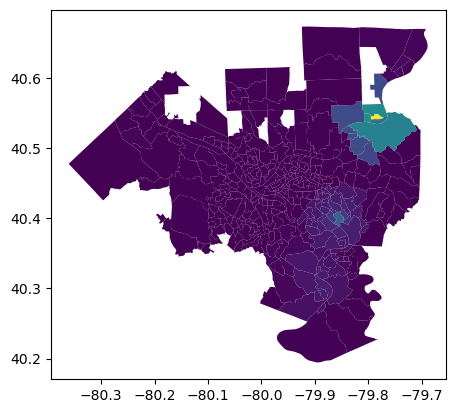

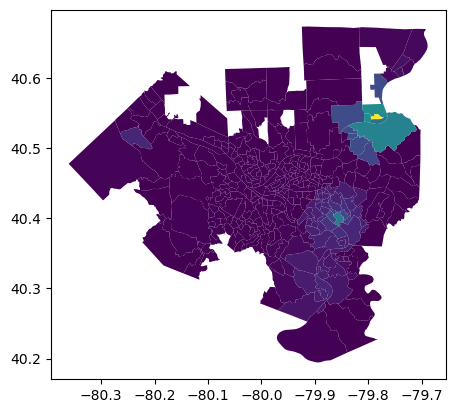

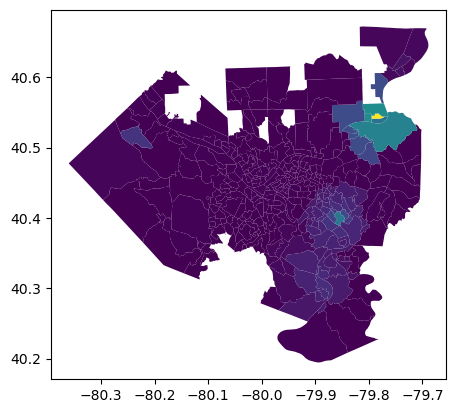

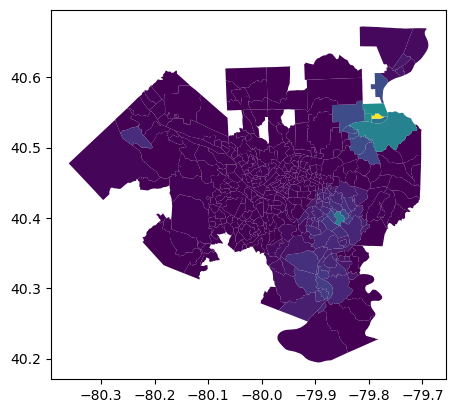

In [14]:
#Merging each year with geoenabled data for mapping 
AlCo = gpd.read_file('alcogisallegheny-county-census-tracts-2016.geojson')
AlCo['TRACTCE'] = AlCo['TRACTCE'].astype(int)
AlCo2016= AlCo.merge(temp[temp['Year']==2016], how = 'left', left_on='TRACTCE', right_on='TractCE')
AlCo2016.plot(column='Grand Total')
AlCo2016['Year'] = AlCo2016['Year'].fillna(2016)
AlCo2017= AlCo.merge(temp[temp['Year']==2017], how = 'left', left_on='TRACTCE', right_on='TractCE')
AlCo2017.plot(column='Grand Total')
AlCo2017['Year'] = AlCo2017['Year'].fillna(2017)
AlCo2018= AlCo.merge(temp[temp['Year']==2018], how = 'left', left_on='TRACTCE', right_on='TractCE')
AlCo2018.plot(column='Grand Total')
AlCo2018['Year'] = AlCo2017['Year'].fillna(2018)
AlCo2019= AlCo.merge(temp[temp['Year']==2019], how = 'left', left_on='TRACTCE', right_on='TractCE')
AlCo2019['Year'] = AlCo2019['Year'].fillna(2019)
AlCo2019.plot(column='Grand Total')

#Merging all years together
geo_emissions_data = pd.concat([AlCo2016, AlCo2017, AlCo2018, AlCo2019])

#Removing mapping related columns
emissions_data = geo_emissions_data[['TRACTCE']+geo_emissions_data.columns.to_list()[14:]]
emissions_data=emissions_data.fillna(0)
emissions_data

In [15]:
#Exporting final csv for use in further cleaning
emissions_data.to_csv('final_emissions_data.csv')